# Credit Card Fraud Detection - XgBoost

### Loading Data in

In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Train-Test-Split

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class']) #we want every feature besides our expected label, that label being 'class'
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Data Pre-Processing

* Handling Imbalanced Data with **SMOTE** (**S**ynthetic **M**inority **O**ver-**s**ampling **T**echnique)

* SMOTE is a technique used in classification when data is imbalanced, it creates synthetic examples of a minority class to balance class distributions within a dataset.
    * Generating new synthetic samples

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## XgBoost Training

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [7]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

## Evaluation Metrics: Classification Results via XgBoost

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

### Confusion Matrix

**Gives us insights into:**
* **True Positives (TP):** No. of fradulent transactions correctly classified as fraud
* **True Negatives (TN):** No. of non-fradulent transactions classified as non-fradulent
* **False Positives (FP):** No. of non-fradulent transactions incorrectly classified as frauds
* **False Negatives (FN):** No. of fradulent transactions incorrectly classified as non-fraud

In [9]:
print(confusion_matrix(y_test, y_pred))

[[56724   140]
 [   12    86]]


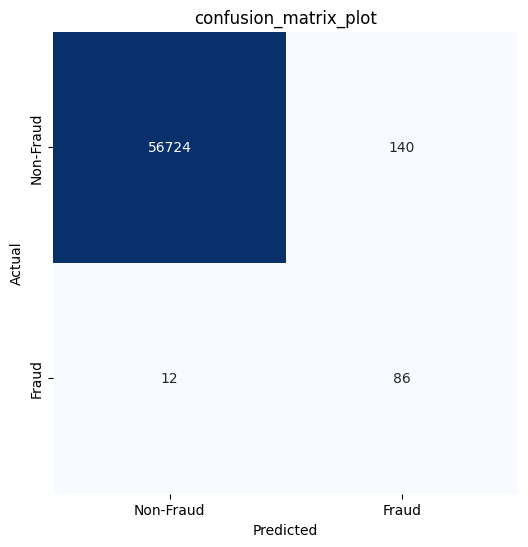

In [10]:
def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
               xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("confusion_matrix_plot")
    plt.show()
    
confusion_matrix_plot(y_test, y_pred)

### Precision & Recall

* **Precision:** Measures how accurate positive predicitons are
    * Precision Formula: TP / (TP + FP) 
    * High Precision: Less False Alarms

* **Recall:** Measures how well the model finds all positive cases
    * Recall Formula: TP / (TP + FN)
    * High Recall: Less Missed Positives


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.88      0.53        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.76     56962
weighted avg       1.00      1.00      1.00     56962



### ROC Curve (Receiver Operating Characteristic) (AUC)

Context: ROC curve score is an evaluation metric that helps one evaluate how well classification models distinguish between two outcomes (e.g. Fraud or Not Fraud)

* **Results:** 0.937 (rounds to 0.94), which indicates the model is performing well
* Model results vary from 0-1, 0 being the worst, 1 being the best score one can receive

(Fun Fact: The reason why ROC is called ROC is because it was developed in World War II, for radar signal detection. Being used to analyze radar operations in hopes of distinguishing enemy aircraft from noise.

Receiver: Refers to radar receiver equipment
Operating: Relates to the operator using the equipment
Characteristic: Describes the performance of both the reciever and the operator)

In [12]:
print(roc_auc_score(y_test, y_pred))

0.9375445028883809
